In [1]:
from bankingSystem import * 
from helperFunctions import *
from tqdm import tqdm
import matplotlib.pyplot as plt
import networkx as nx
import warnings 
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2
%pylab inline 
pylab.rcParams['figure.figsize'] = (20, 5)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
def run():
    # simulation and data collection
    simulationSteps = 500
    model = bankingSystem(banksFile="balanceSheetAnalysis/banksData_2022.csv", # csv file used to initialize the bank agents
                    leverageRatio = 11.0,                                     # leverage ratio upper bound for all banks
                    capitalReserve = 0.0,                                     # capital reserve as a ratio of portfolio value
                    num_borrowing= 20,                                        # number of borrowing request per bank per step
                    sizeOfBorrowing = 1,                                      # size of borrowing as a ratio of equity capital
                    num_banks=100,                                            # number of banks in the system 
                    alpha = 0.9,                                              # portfolio recovery rate                           
                    beta = 0.9,                                               # interbank loan recovery rate
                    fedRate = 0.04/252,                                            # interest rate on borrowing   
                    portfolioReturnRate = 0.04/252,                                # return rate on portfolio
                    liquidityShockNum = 2,                                    # number of liquidity shocks per step      
                    shockSize = 0.1,                                          # size of the shock
                    shockDuration =  [simulationSteps // 10 * 6, simulationSteps // 10 * 7]) # duration of the shock
                    
    model.datacollector.collect(model)
    for i in tqdm(range(simulationSteps)):
        model.simulate()

    agent_data = model.datacollector.get_agent_vars_dataframe()
    model_data = model.datacollector.get_model_vars_dataframe()
    return model_data, agent_data, model

model_data_collection = []
agent_data_collection = []
model_collection = []
for _ in range(2):
    m, a, model = run()
    model_data_collection.append(m)
    agent_data_collection.append(a)
    model_collection.append(model)

  7%|▋         | 37/500 [00:06<01:21,  5.65it/s]


KeyboardInterrupt: 

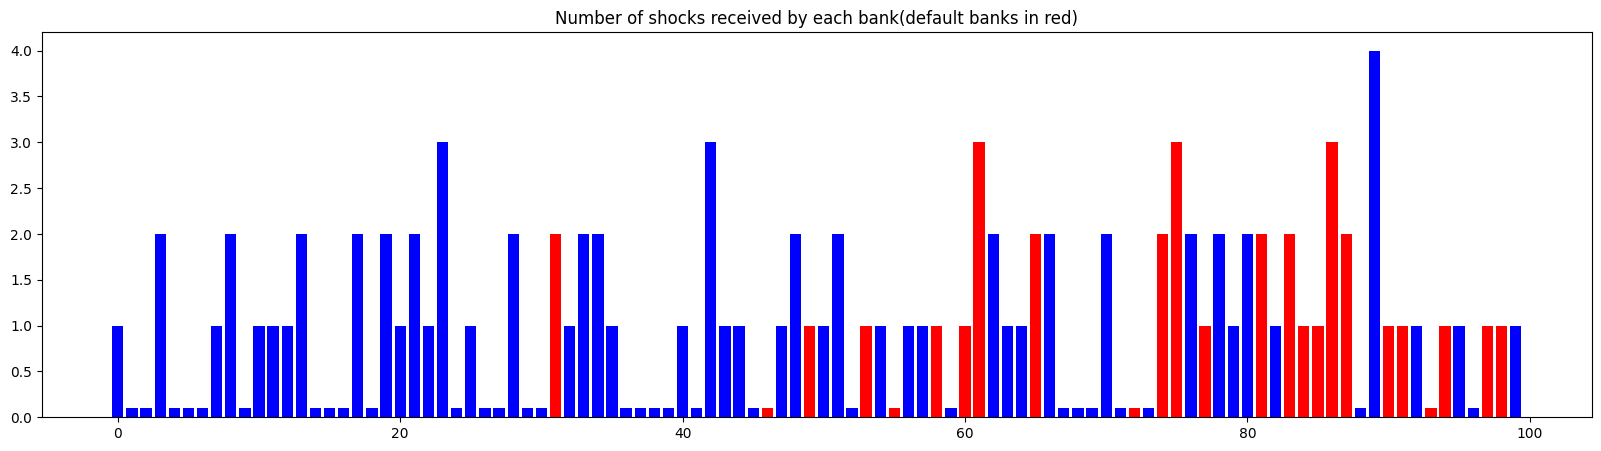

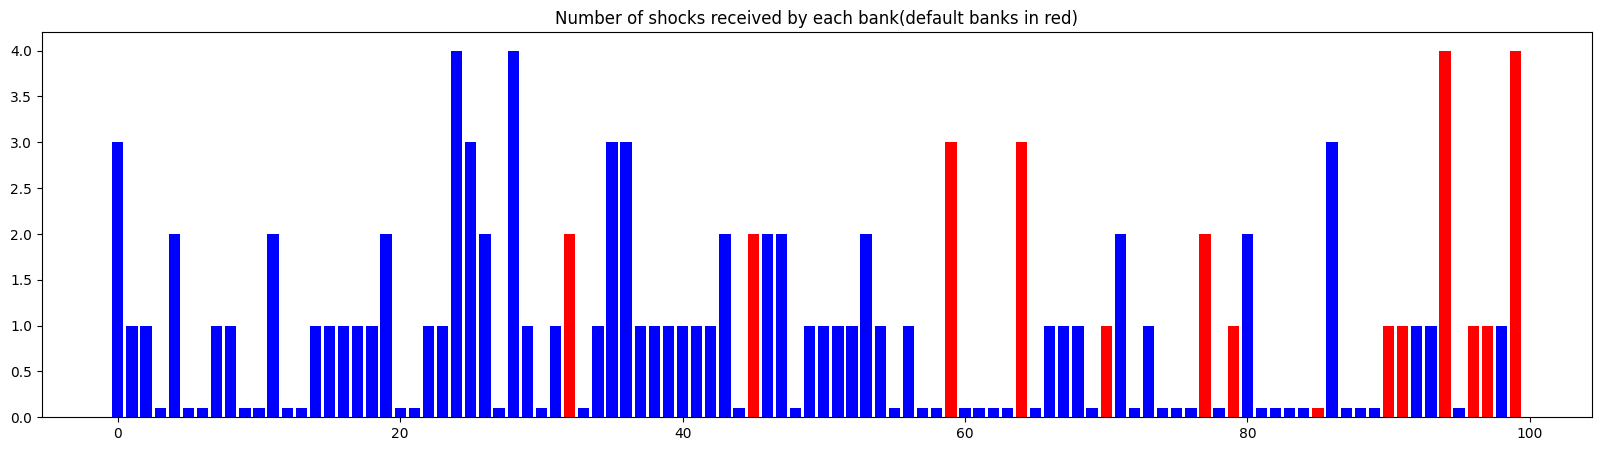

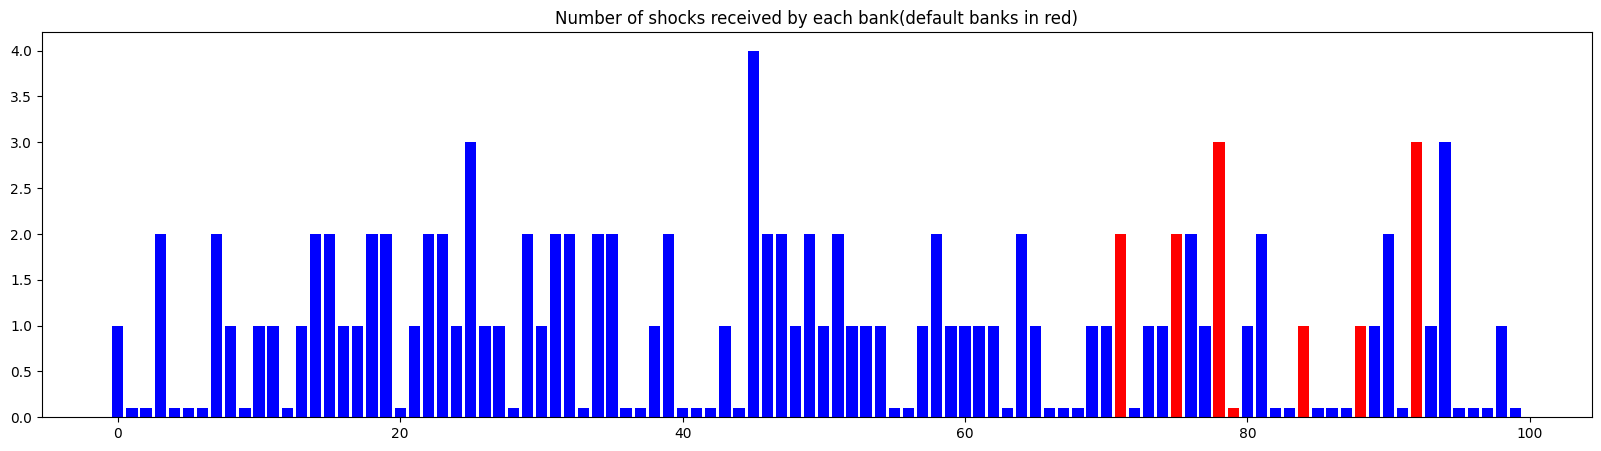

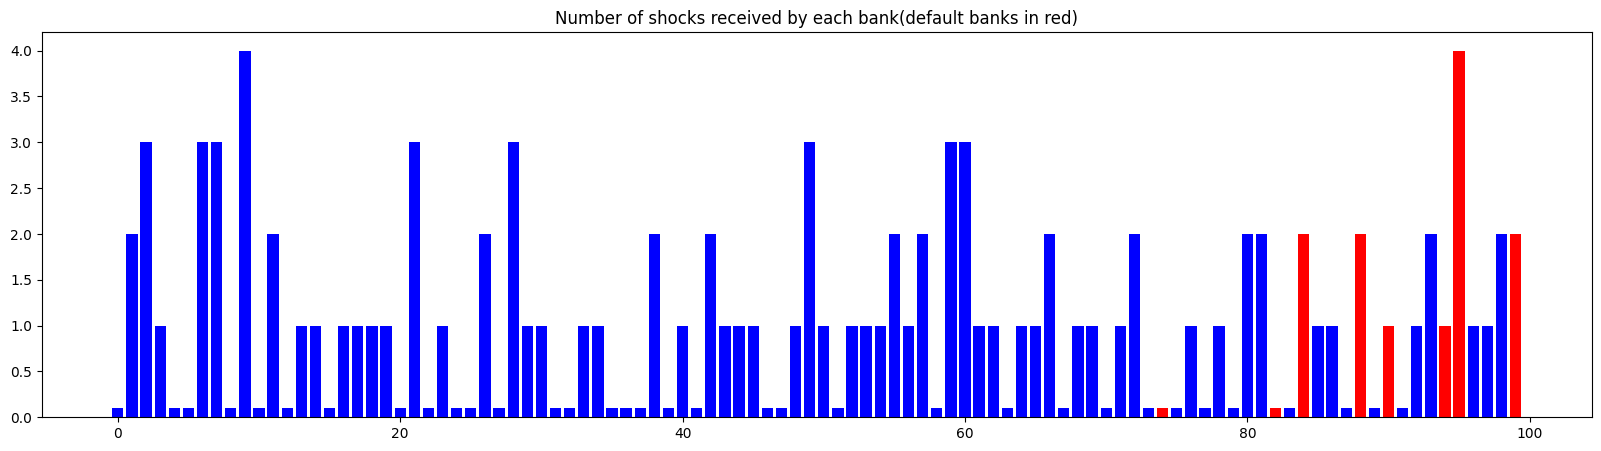

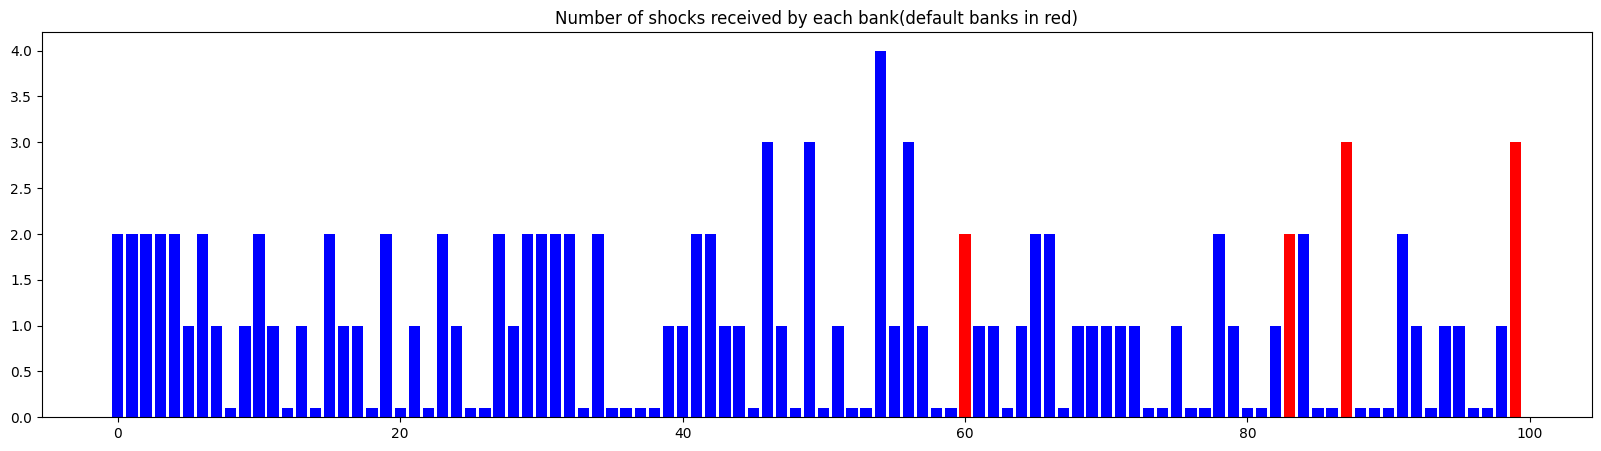

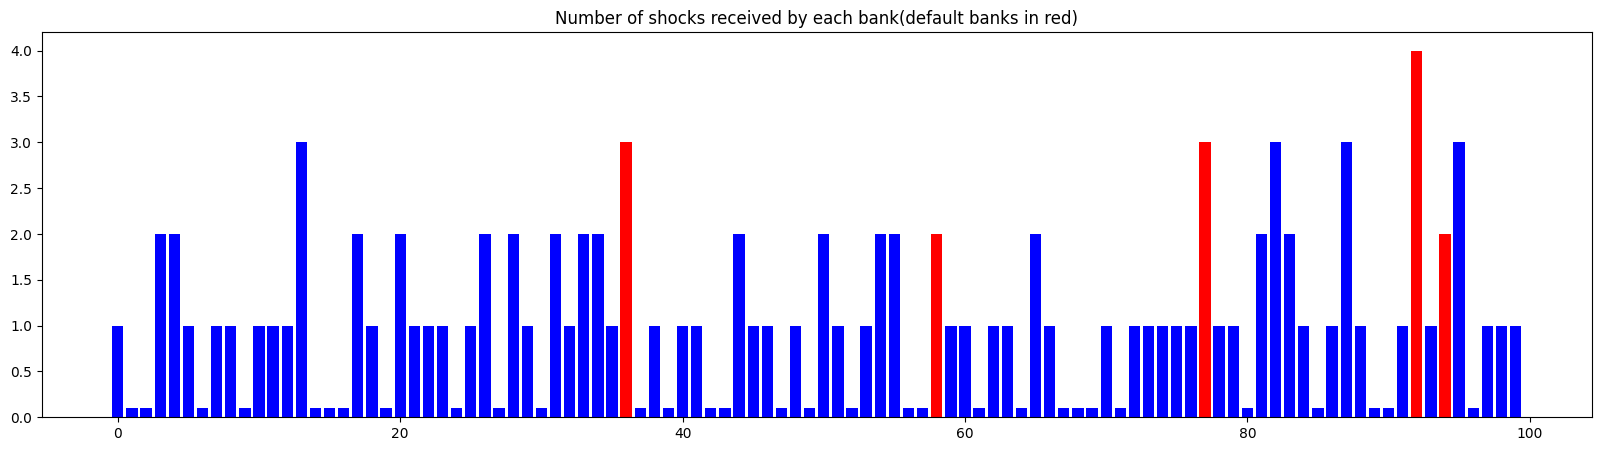

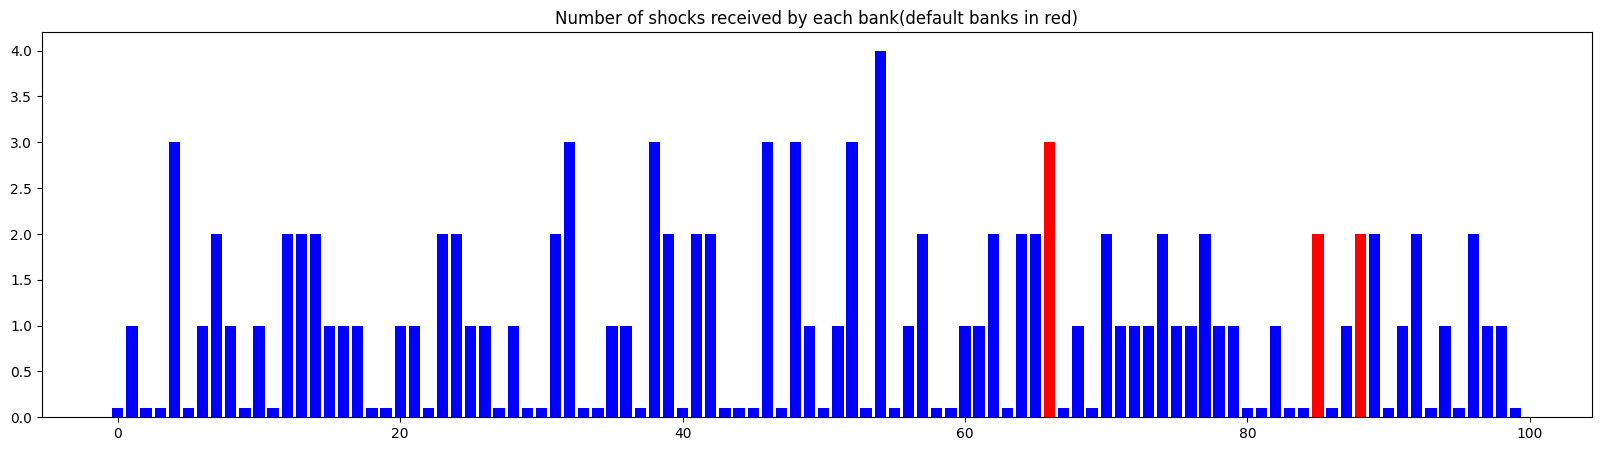

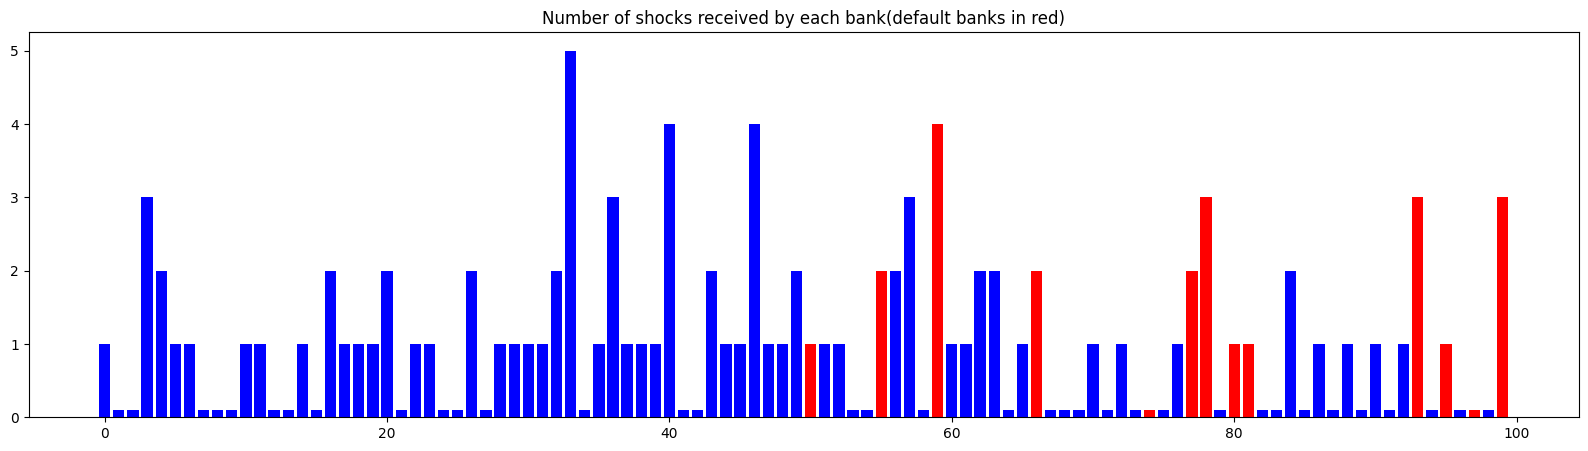

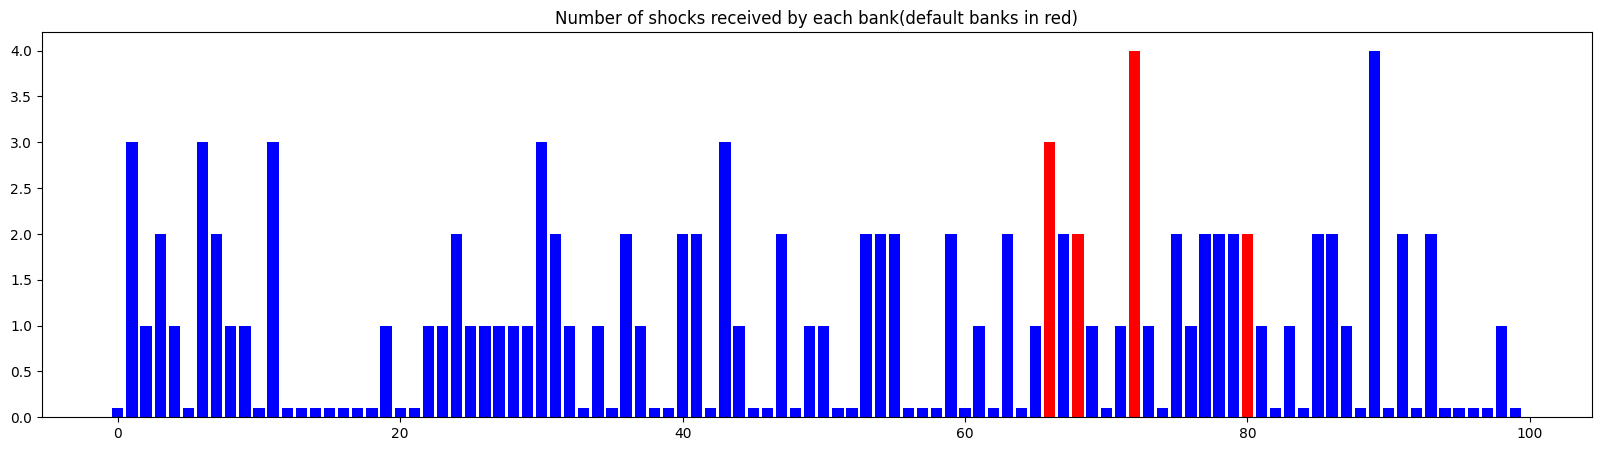

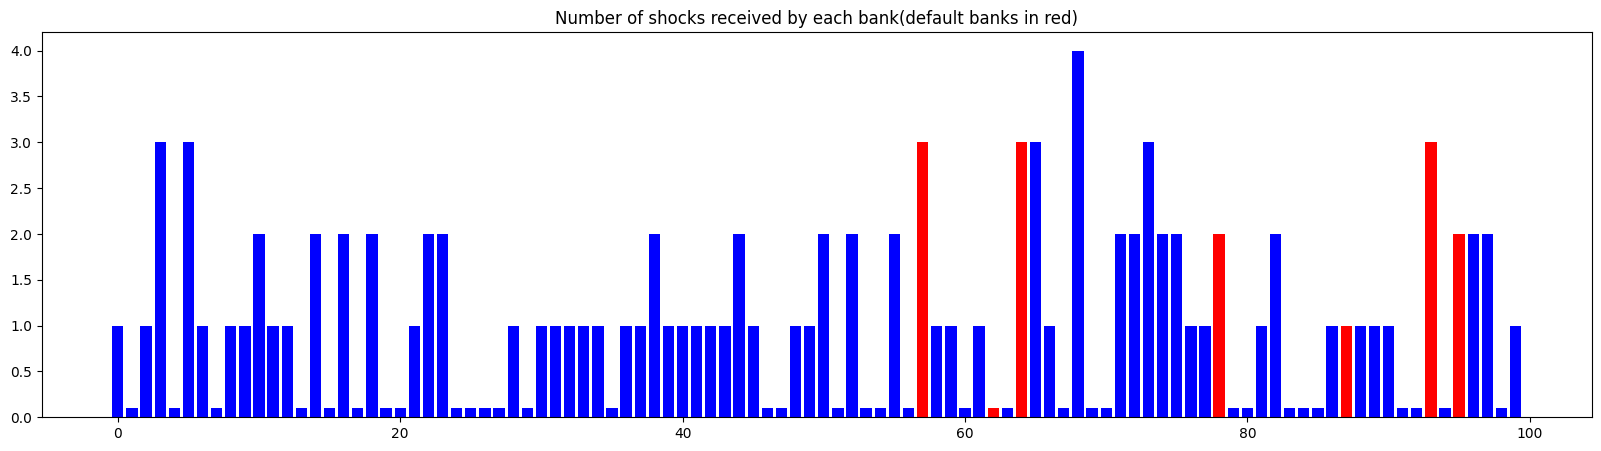

In [ ]:
# shock analysis
simulationSteps=500
for agent_data, model in zip(agent_data_collection, model_collection):
    agents_df = agent_data.xs(simulationSteps, level="Step")
    defaults = agents_df[agents_df.Default ==True].index
    red_bars = defaults
    plt.title("Number of shocks received by each bank(default banks in red)")
    keyVals = [] 
    for k, v in model.shockedBanks.items():
        keyVals.append([k,v])
    
    for i in range(100):
        if i not in model.shockedBanks:
            keyVals.append([i,0.1])
    
    keyVals = np.array(keyVals)
    bar_colors = ['red' if i in red_bars else 'blue' for i in keyVals[:,0]]
    plt.bar(keyVals[:,0], keyVals[:,1],color=bar_colors)
    plt.show()

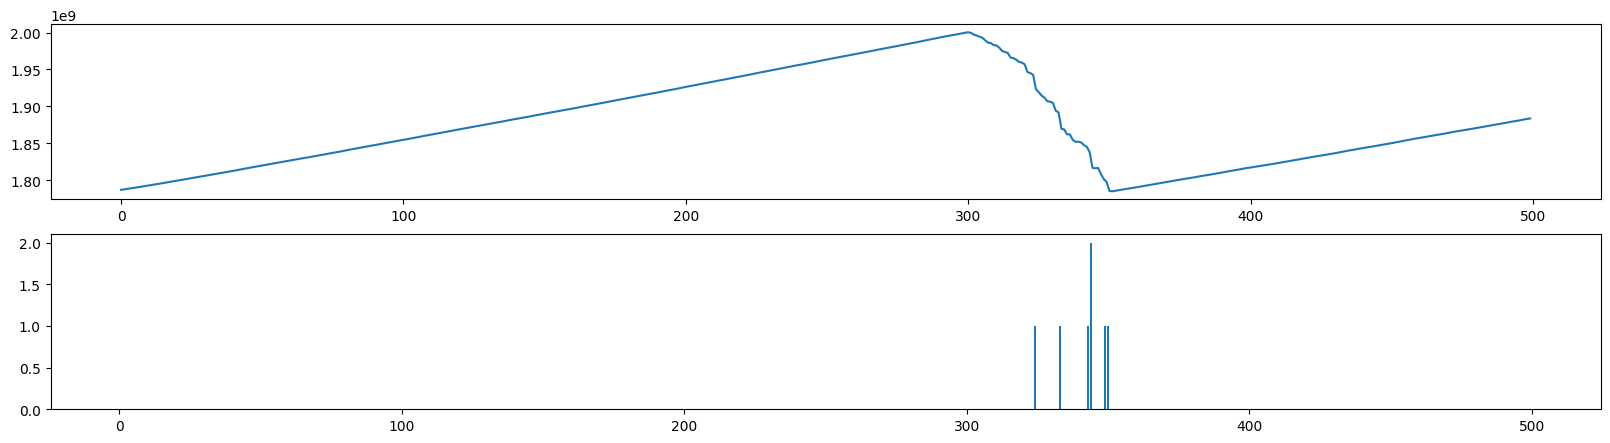

In [ ]:
numberOfDefault = [agent_data.xs(i, level="Step")["Default"].sum() for i in range(simulationSteps)]
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(range(simulationSteps), [agent_data.xs(i, level="Step")["PortfolioValue"].sum() for i in range(simulationSteps)])
ax2.bar(range(1, simulationSteps), np.diff(numberOfDefault))
plt.show()

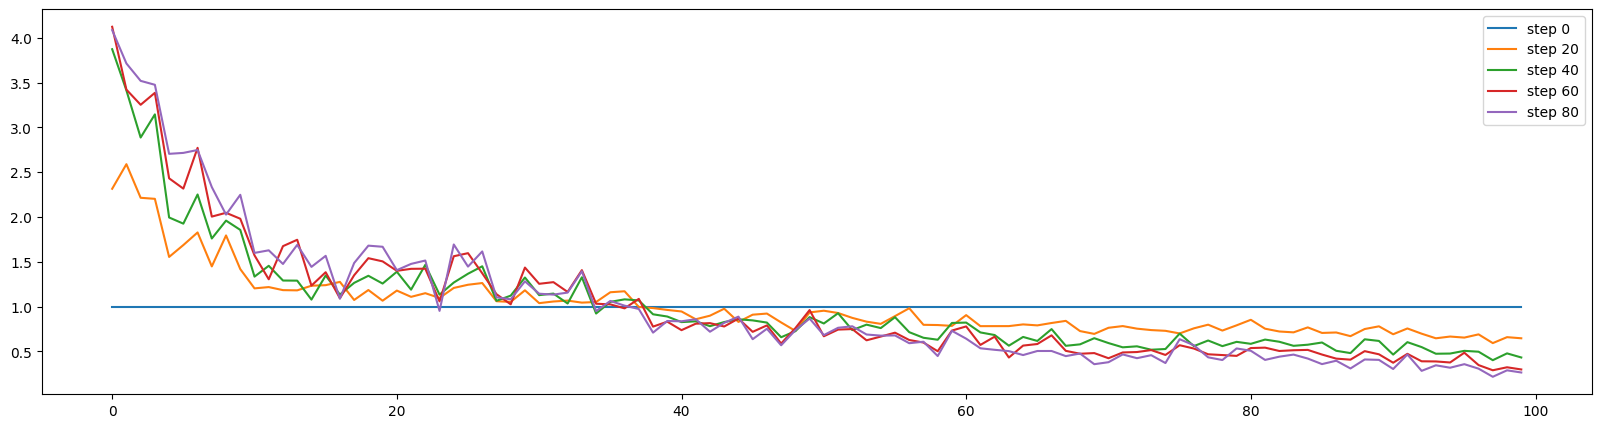

In [ ]:
for i in range(simulationSteps):
    if i in range(0,100,20):
        plt.plot(range(100),model_data["Trust Matrix"][i].sum(axis = 0), label = "step " + str(i))
plt.legend()

Step:  0


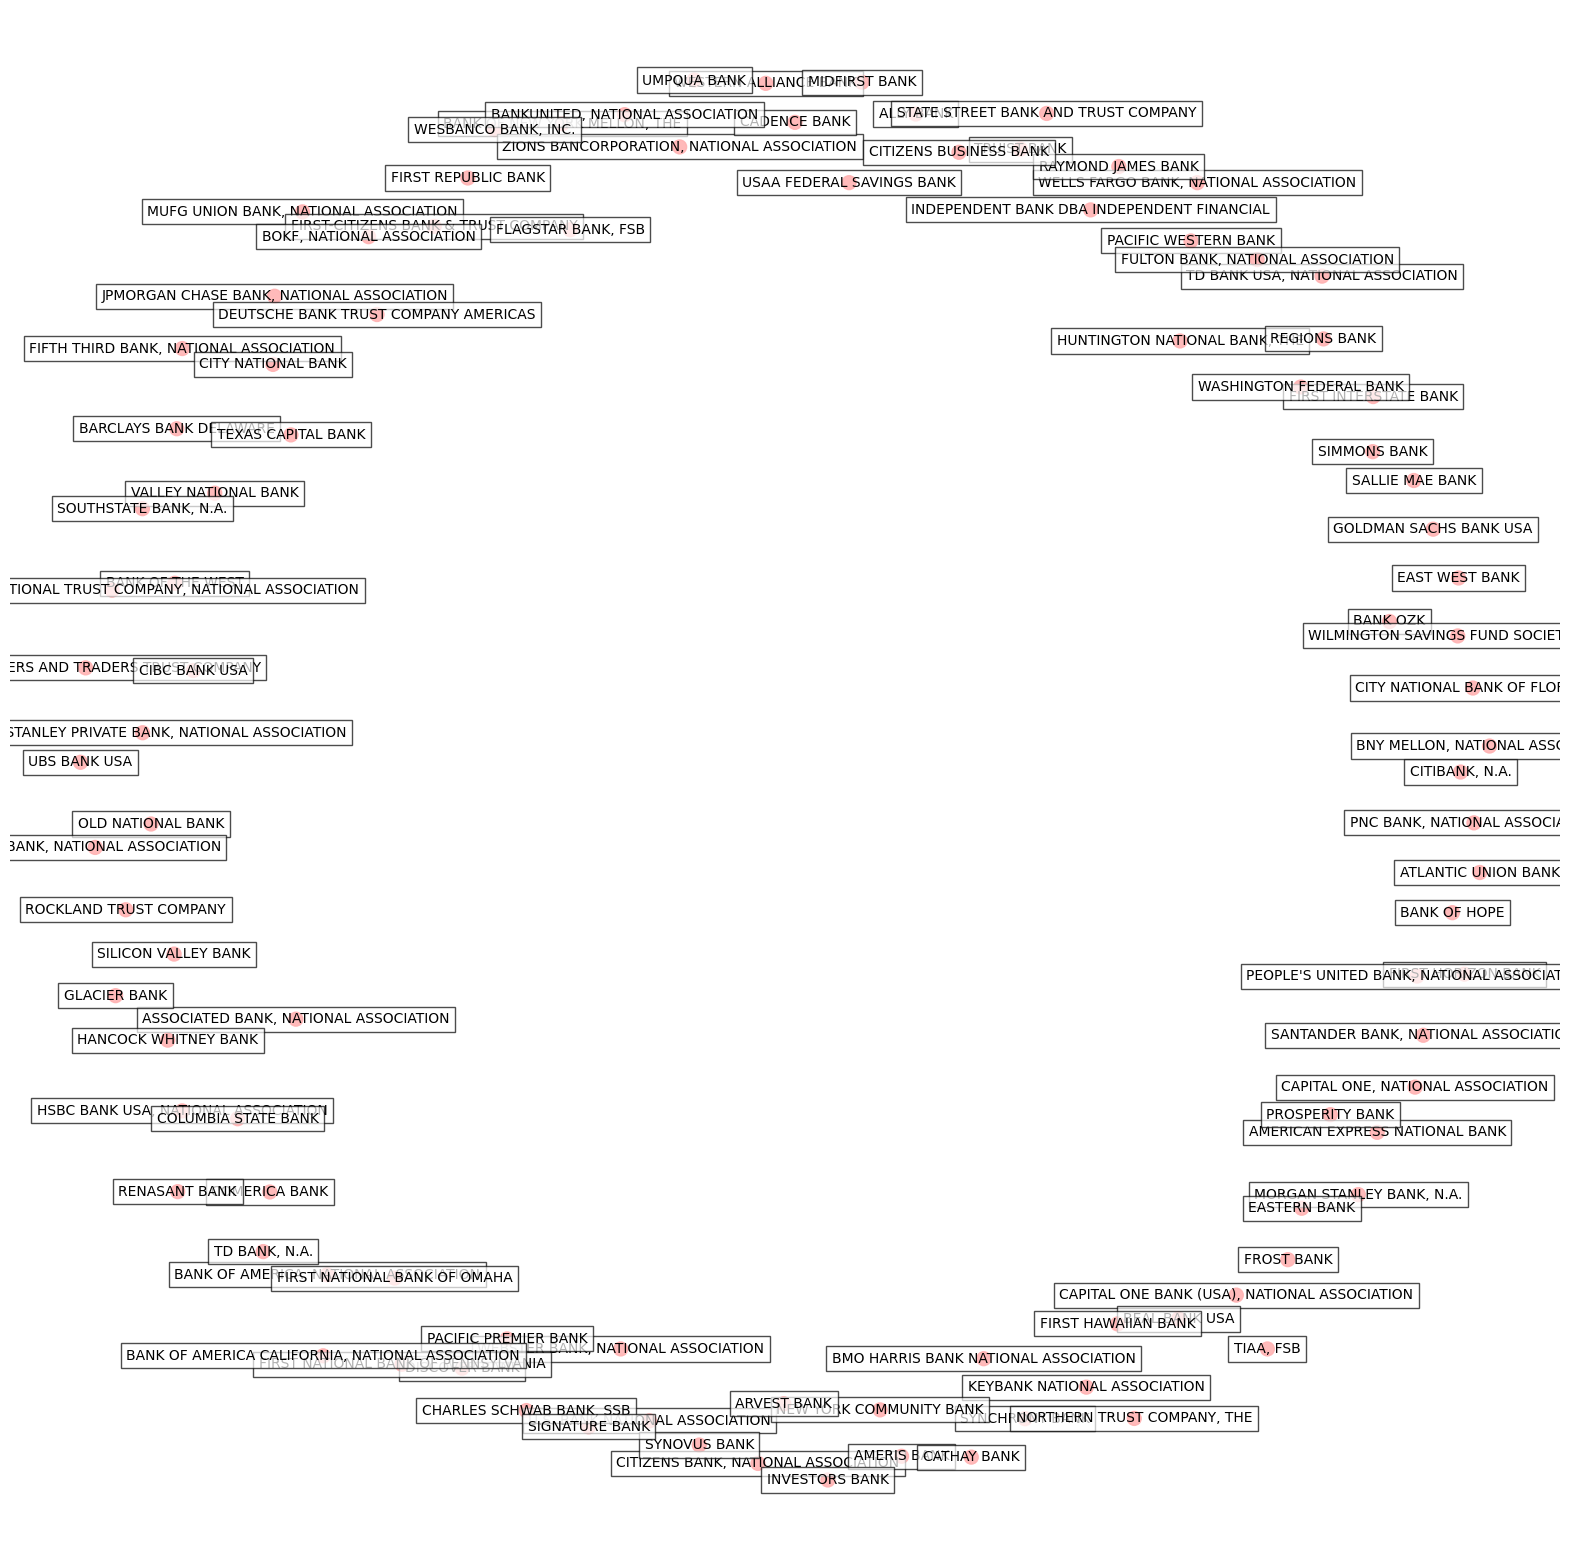

Step:  100


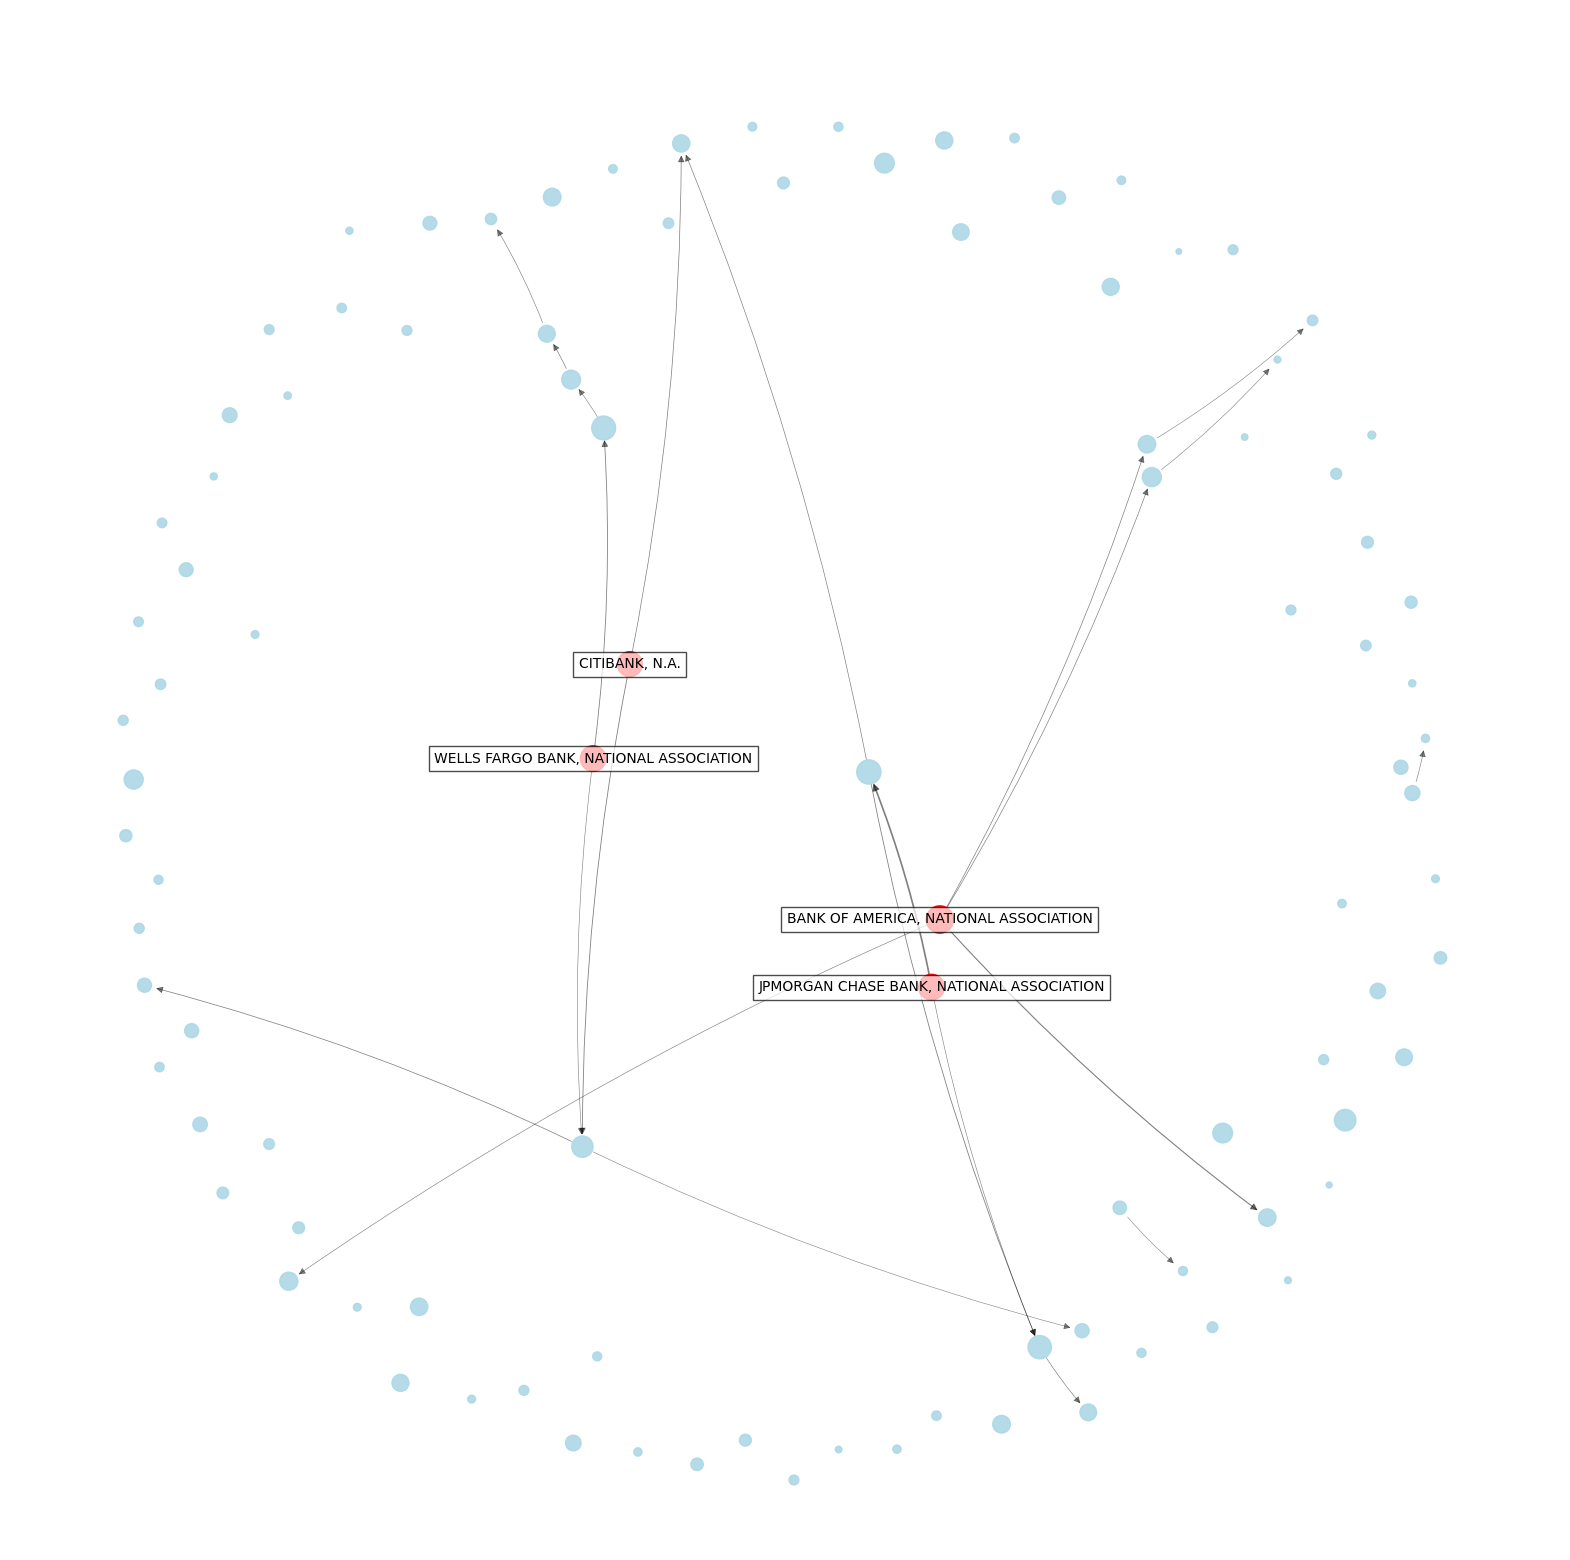

Step:  200


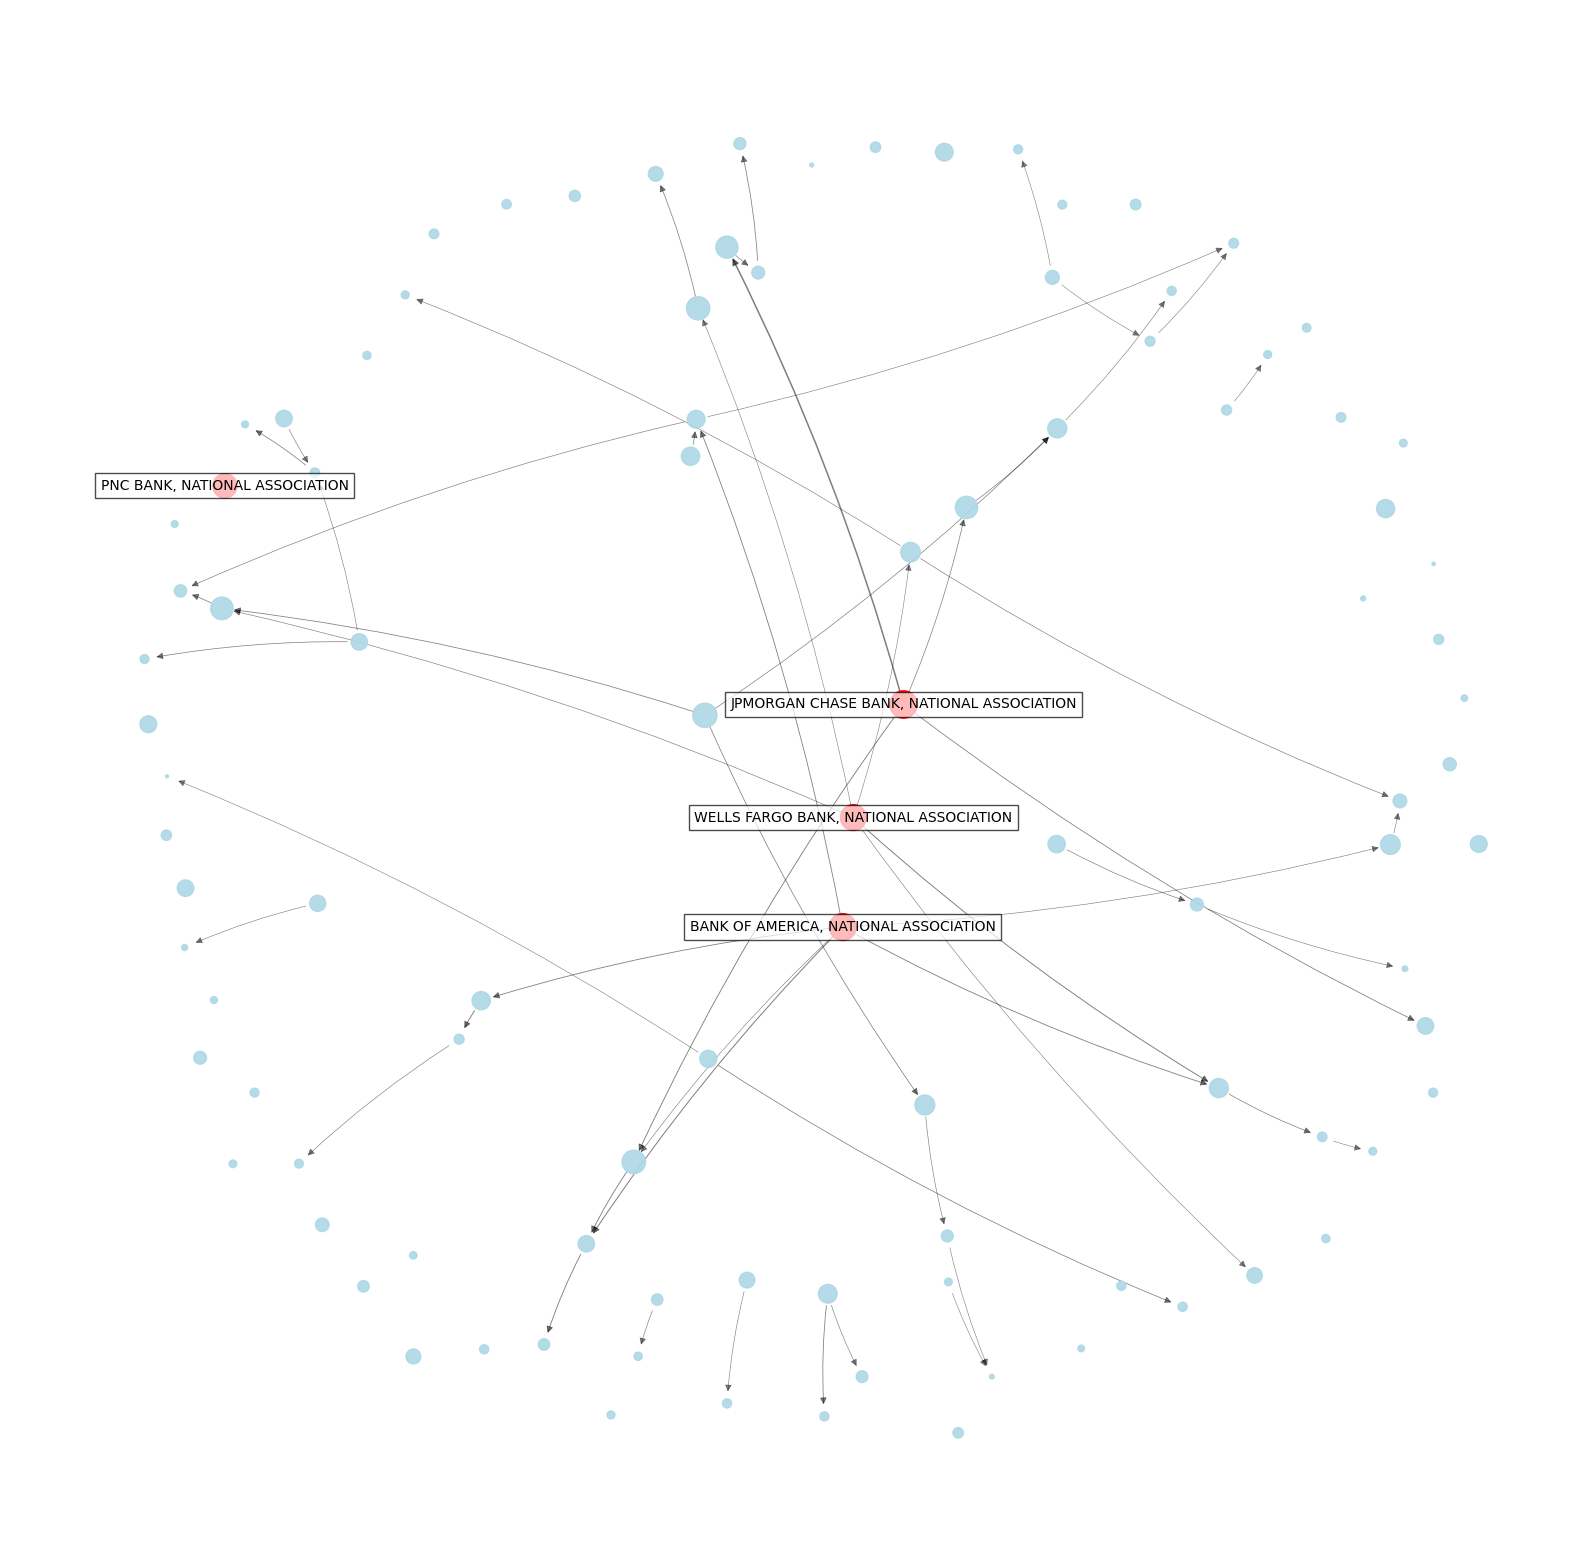

Step:  300


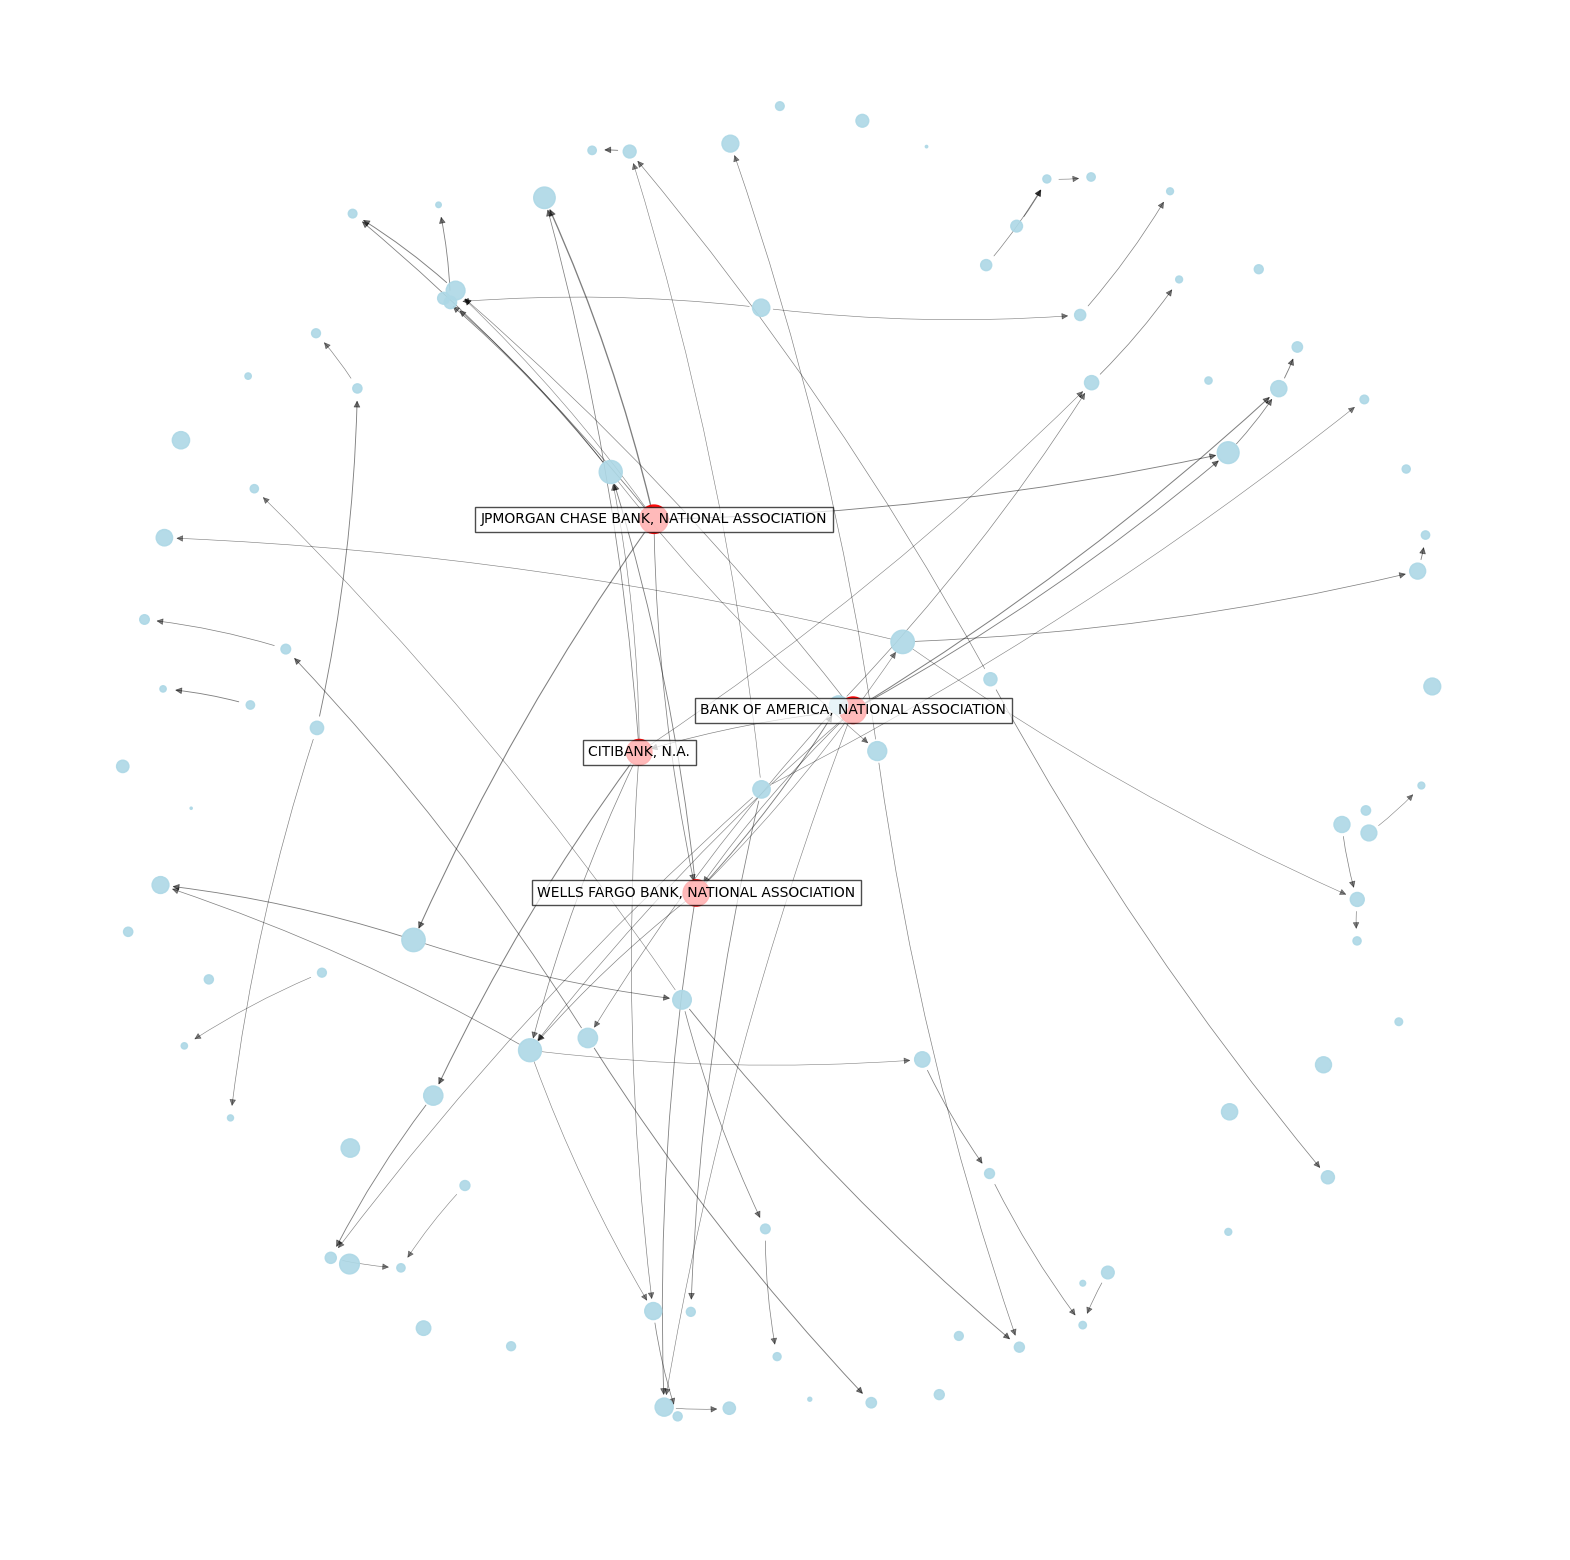

Step:  400


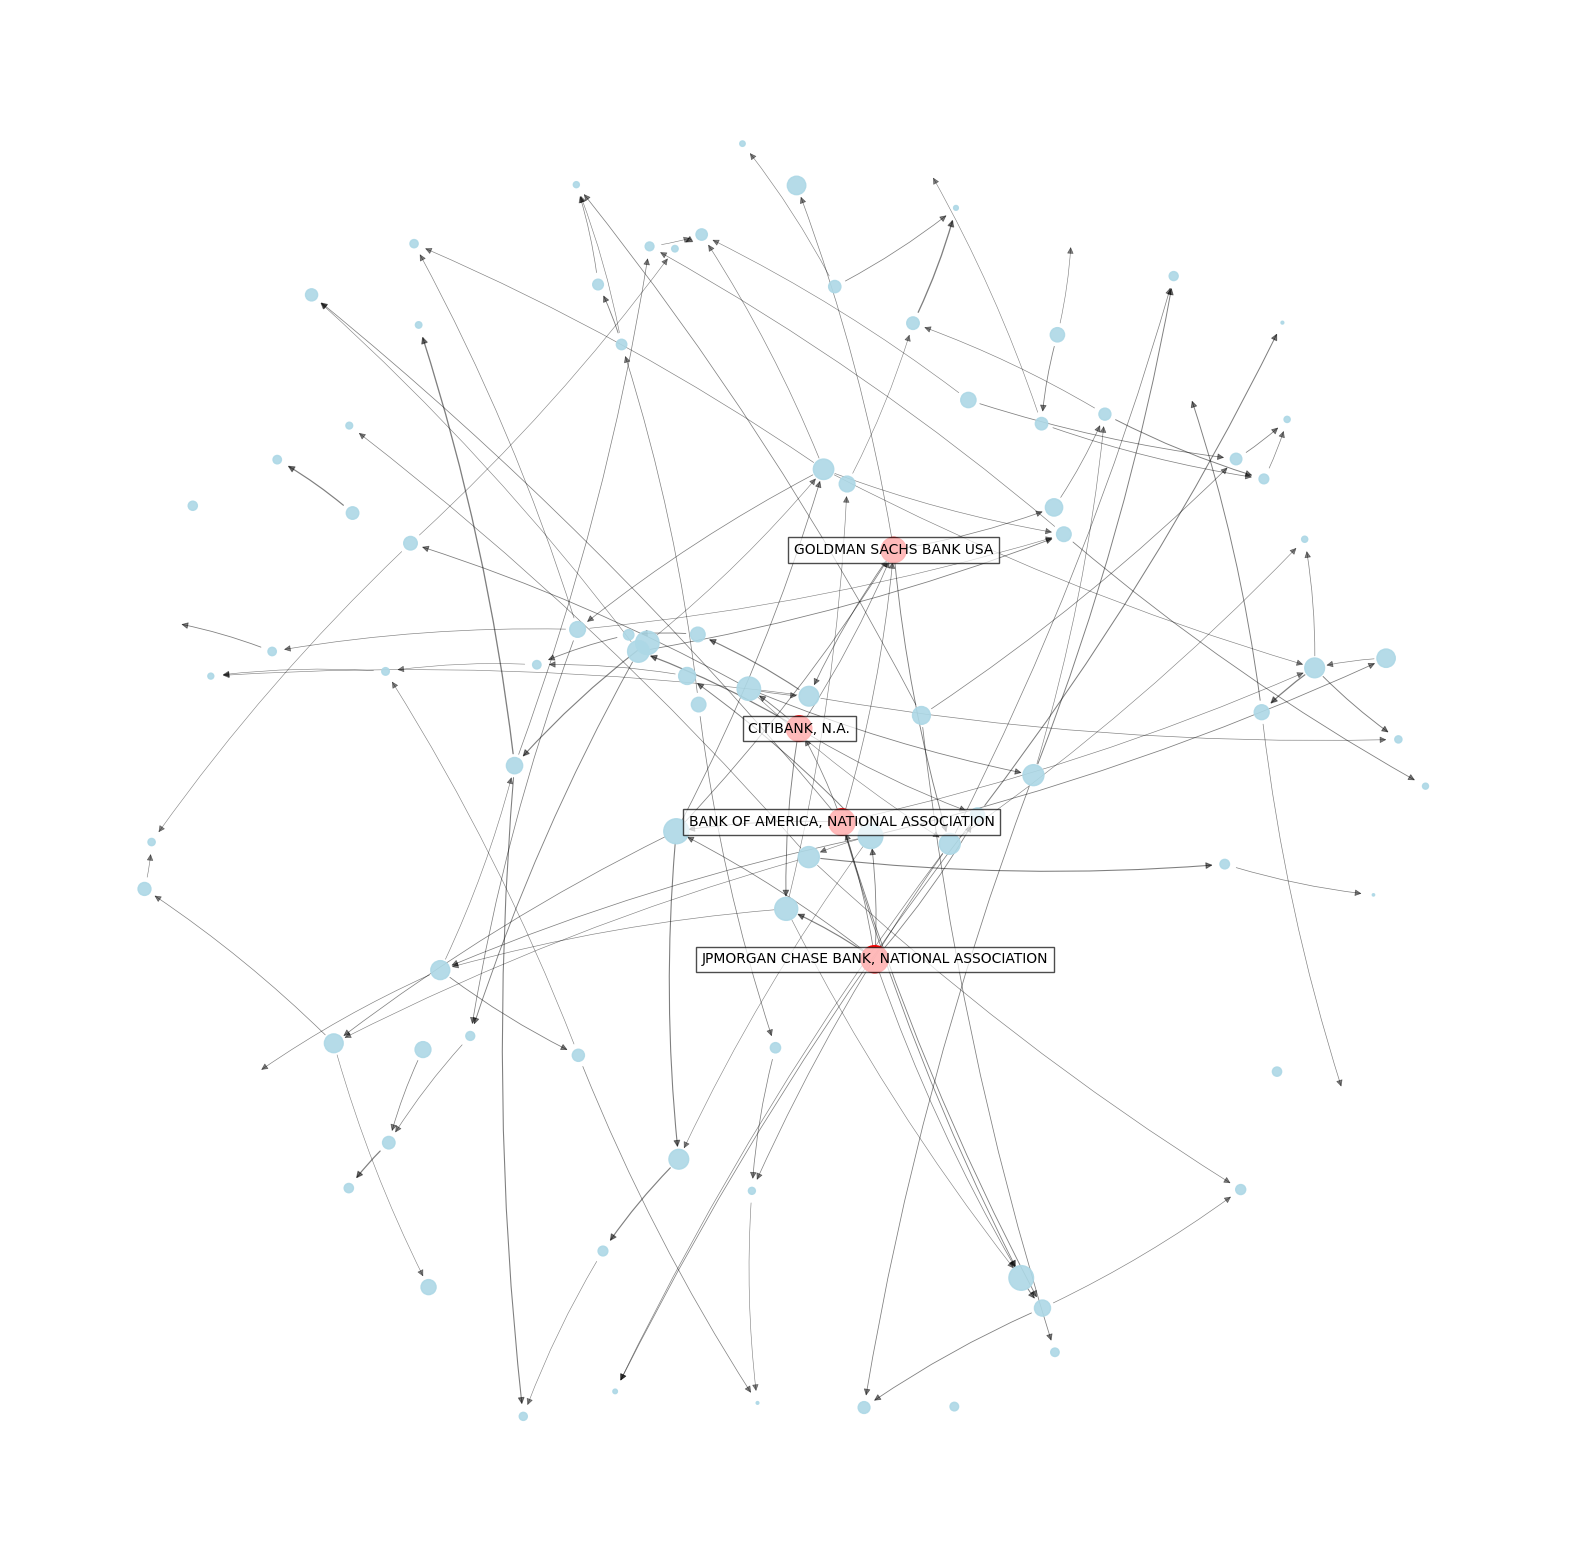

In [ ]:
for i in range(0, simulationSteps, simulationSteps//5):
    print("Step: ", i)
    trustMatrix = model_data["Trust Matrix"].iloc[i]
    netWorkGraph(matrix=trustMatrix, model = model)

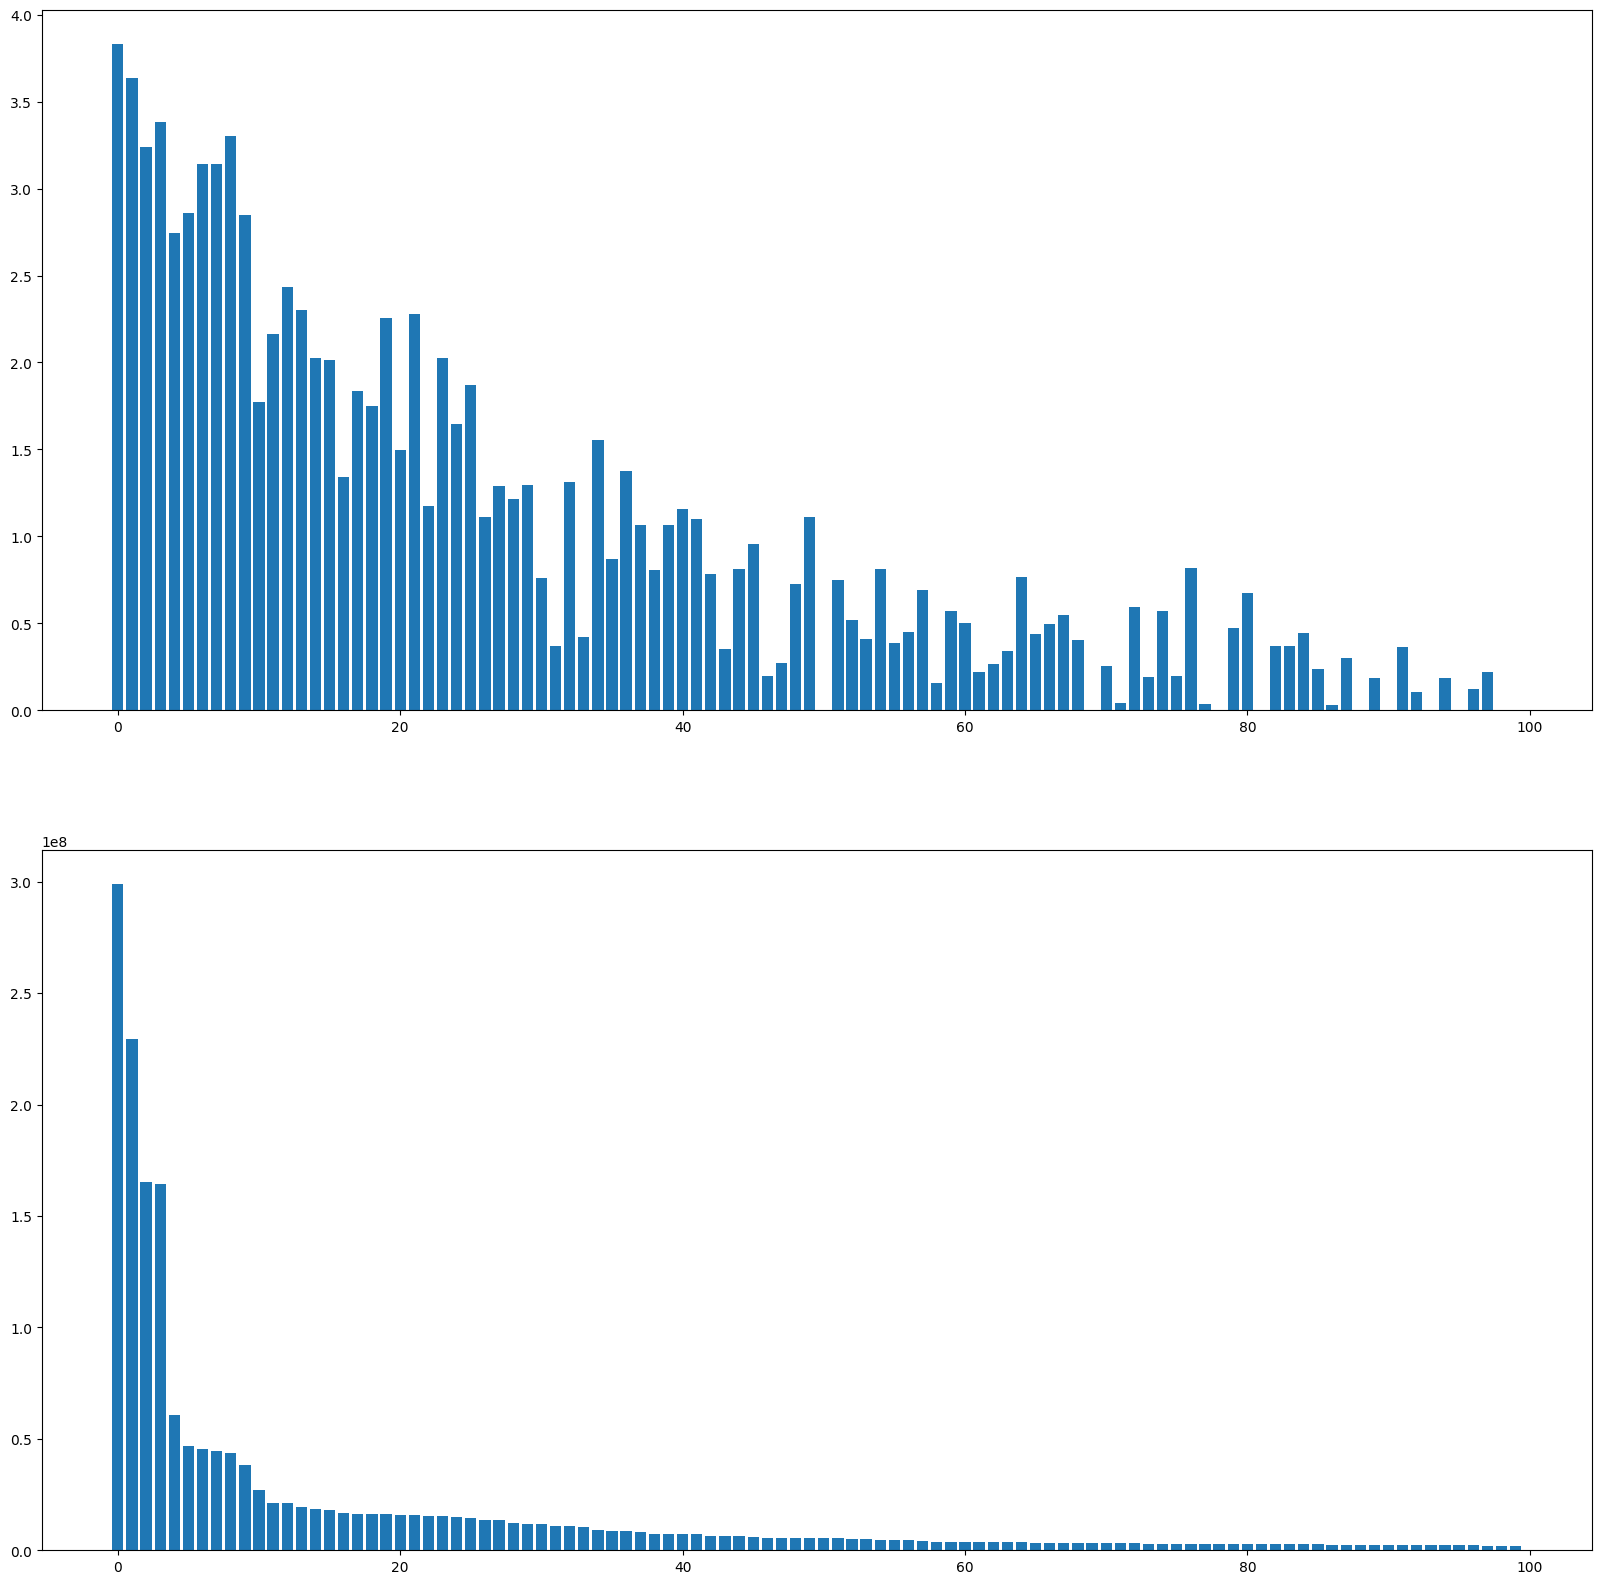

In [ ]:
# bar chart of portfolio value
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.bar(range(model.N), trustMatrix.sum(axis = 0))
ax2.bar(range(model.N), agent_data.xs(0, level="Step")["Equity"])
plt.show()

In [ ]:
model.banks.head(10)

0    JPMORGAN CHASE BANK, NATIONAL ASSOCIATION
1        BANK OF AMERICA, NATIONAL ASSOCIATION
2       WELLS FARGO BANK, NATIONAL ASSOCIATION
3                               CITIBANK, N.A.
4                                  TRUIST BANK
5               PNC BANK, NATIONAL ASSOCIATION
6               U.S. BANK NATIONAL ASSOCIATION
7                                TD BANK, N.A.
8                       GOLDMAN SACHS BANK USA
9            CAPITAL ONE, NATIONAL ASSOCIATION
Name: bank, dtype: object

In [ ]:
def R_tau(model):
    value = model.e - pd.read_csv("balanceSheetAnalysis/banksData_2022.csv")["equity"][:100].values.reshape(-1,1)
    value[value <= 0] = -np.log(1-value[value <= 0])
    value[value > 0] = np.log(1+value[value > 0])
    return value
R_tau(model)

array([[ 17.24129039],
       [ 17.06747331],
       [ 16.90646382],
       [ 16.89741391],
       [ 16.48954501],
       [ 16.21646305],
       [ 16.35419992],
       [ 16.23961332],
       [ 16.36217556],
       [ 16.15960773],
       [-16.08227539],
       [ 13.86000077],
       [ 15.74273354],
       [ 15.57514767],
       [ 15.1988371 ],
       [ 13.93071436],
       [-15.26257339],
       [ 15.21539815],
       [ 15.46652187],
       [ 15.34379719],
       [ 13.05277685],
       [ 13.16501696],
       [-15.70696533],
       [-14.23711068],
       [-15.36549135],
       [-12.6124816 ],
       [-14.80797241],
       [-14.83267874],
       [-15.58716473],
       [-15.26758588],
       [-15.88808471],
       [-16.1014252 ],
       [-13.21216175],
       [-16.09115622],
       [ 12.41090354],
       [-15.01583617],
       [ 14.67202497],
       [ 13.72791459],
       [-15.10143325],
       [-15.49379407],
       [-14.76951259],
       [ 14.57081261],
       [-15.08494223],
       [-15